In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
! kaggle datasets download -d masoudnickparvar/brain-tumor-mri-dataset --unzip


zsh:1: command not found: kaggle


In [4]:
def get_class_paths(path):
    classes = []
    class_paths = []
    # Iterate through directories in the training path
    for label in os.listdir(path):
        label_path = os.path.join(path,label)
        
        # Check if it's a directory
        if os.path.isdir(label_path):
            # Iterate through images in the label directory
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path,image)
                
                # Add class and path to respective lists
                classes.append(label)
                class_paths.append(image_path)
    
    # Create a DataFrame with the collected data
    df = pd.DataFrame({
        'Class Path': class_paths,
        'Class': classes
    })
    return df

In [5]:
tr_df = get_class_paths('Training')
tr_df

,Class Path,Class
0,Training/pituitary/Tr-pi_0505.jpg,pituitary
1,Training/pituitary/Tr-pi_0263.jpg,pituitary
2,Training/pituitary/Tr-pi_0277.jpg,pituitary
3,Training/pituitary/Tr-pi_1169.jpg,pituitary
4,Training/pituitary/Tr-pi_0511.jpg,pituitary
...,...,...
5707,Training/meningioma/Tr-me_1053.jpg,meningioma
5708,Training/meningioma/Tr-me_0403.jpg,meningioma
5709,Training/meningioma/Tr-me_0365.jpg,meningioma
5710,Training/meningioma/Tr-me_0371.jpg,meningioma


In [13]:
ts_df = get_class_paths('Testing')
ts_df

,Class Path,Class
0,Testing/pituitary/Te-pi_0233.jpg,pituitary
1,Testing/pituitary/Te-pi_0227.jpg,pituitary
2,Testing/pituitary/Te-pi_0019.jpg,pituitary
3,Testing/pituitary/Te-pi_0031.jpg,pituitary
4,Testing/pituitary/Te-pi_0025.jpg,pituitary
...,...,...
1306,Testing/meningioma/Te-me_0080.jpg,meningioma
1307,Testing/meningioma/Te-me_0094.jpg,meningioma
1308,Testing/meningioma/Te-me_0137.jpg,meningioma
1309,Testing/meningioma/Te-me_0123.jpg,meningioma


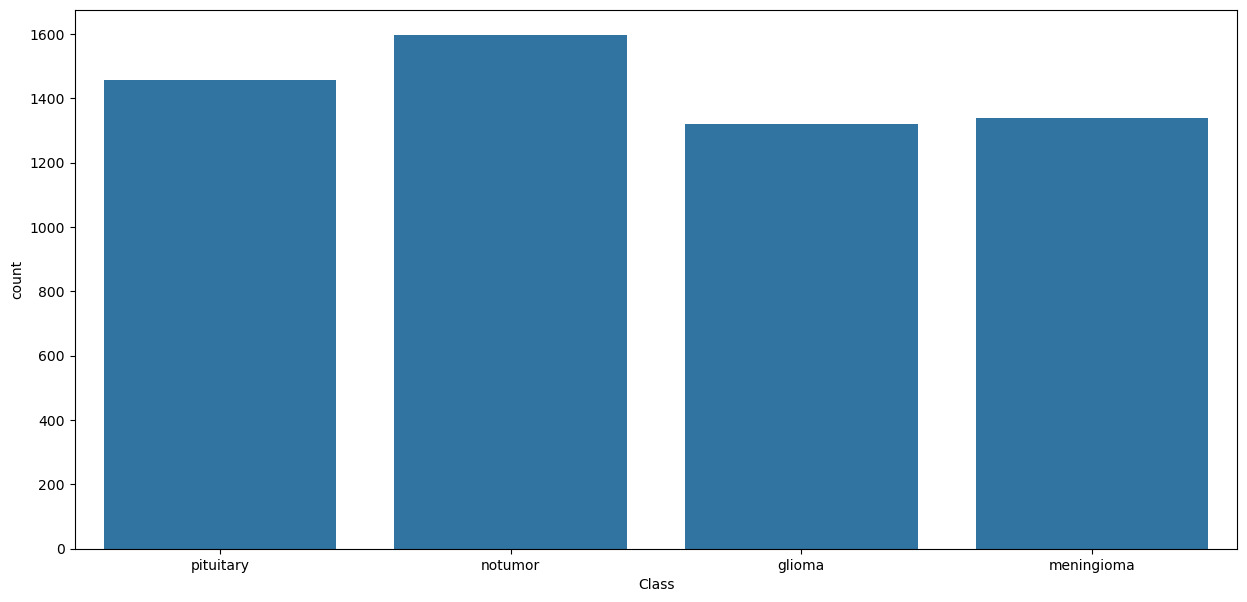

In [7]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df,x=tr_df['Class'])

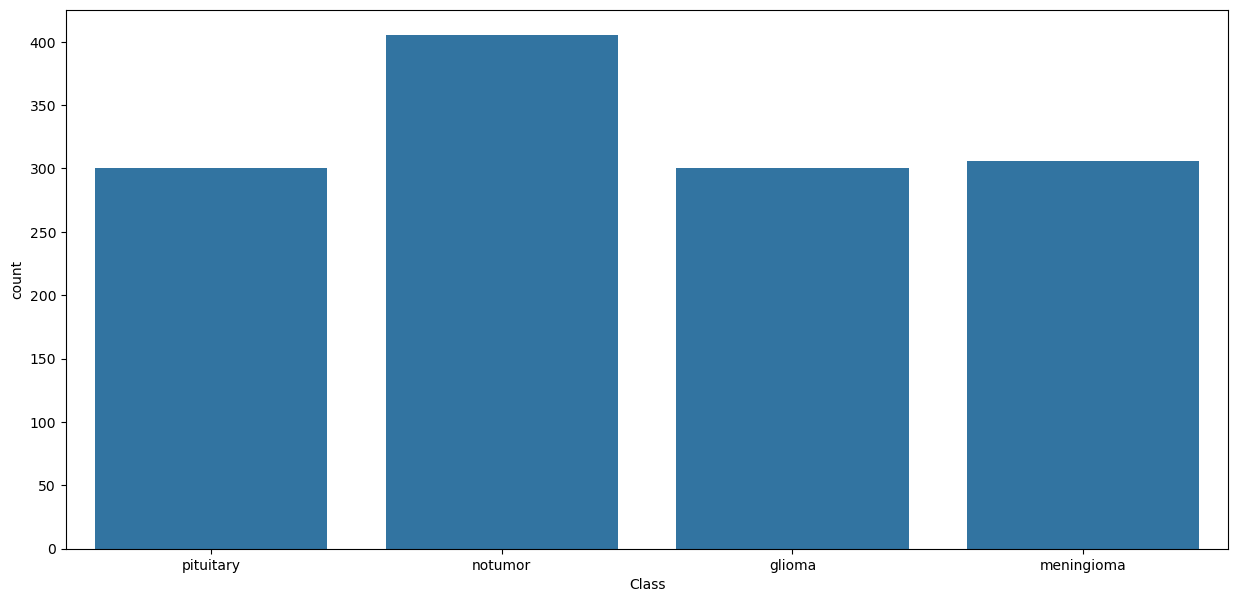

In [14]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data=ts_df,x=ts_df['Class'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
valid_df, ts_df = train_test_split(ts_df,train_size=0.5,stratify=ts_df["Class"])
valid_df

,Class Path,Class
171,Testing/pituitary/Te-pi_0254.jpg,pituitary
415,Testing/notumor/Te-no_0082.jpg,notumor
427,Testing/notumor/Te-no_0378.jpg,notumor
477,Testing/notumor/Te-no_0034.jpg,notumor
39,Testing/pituitary/Te-pi_0235.jpg,pituitary
...,...,...
76,Testing/pituitary/Te-piTr_0000.jpg,pituitary
351,Testing/notumor/Te-no_0292.jpg,notumor
414,Testing/notumor/Te-no_0257.jpg,notumor
989,Testing/glioma/Te-gl_0061.jpg,glioma


In [16]:
ts_df

,Class Path,Class
931,Testing/glioma/Te-gl_0272.jpg,glioma
261,Testing/pituitary/Te-pi_0013.jpg,pituitary
363,Testing/notumor/Te-no_0094.jpg,notumor
26,Testing/pituitary/Te-pi_0185.jpg,pituitary
1205,Testing/meningioma/Te-me_0021.jpg,meningioma
...,...,...
165,Testing/pituitary/Te-pi_0056.jpg,pituitary
1222,Testing/meningioma/Te-me_0047.jpg,meningioma
149,Testing/pituitary/Te-pi_0280.jpg,pituitary
824,Testing/glioma/Te-gl_0145.jpg,glioma


In [18]:
batch_size = 32 

img_size=(299,299)
image_generator = ImageDataGenerator(rescale = 1/255, brightness_range=(0.8,1.2))

ts_gen = ImageDataGenerator(rescale=1/255)

In [20]:
tr_gen = image_generator.flow_from_dataframe(tr_df,x_col='Class Path', y_col='Class', batch_size = batch_size, target_size=img_size)
valid_gen = image_generator.flow_from_dataframe(valid_df,x_col='Class Path', y_col='Class', batch_size = batch_size, target_size=img_size)
ts_gen = ts_gen.flow_from_dataframe(ts_df,x_col='Class Path', y_col='Class', batch_size = 16, target_size=img_size,shuffle=False)

Found 5712 validated image filenames belonging to 4 classes.
Found 655 validated image filenames belonging to 4 classes.
Found 656 validated image filenames belonging to 4 classes.


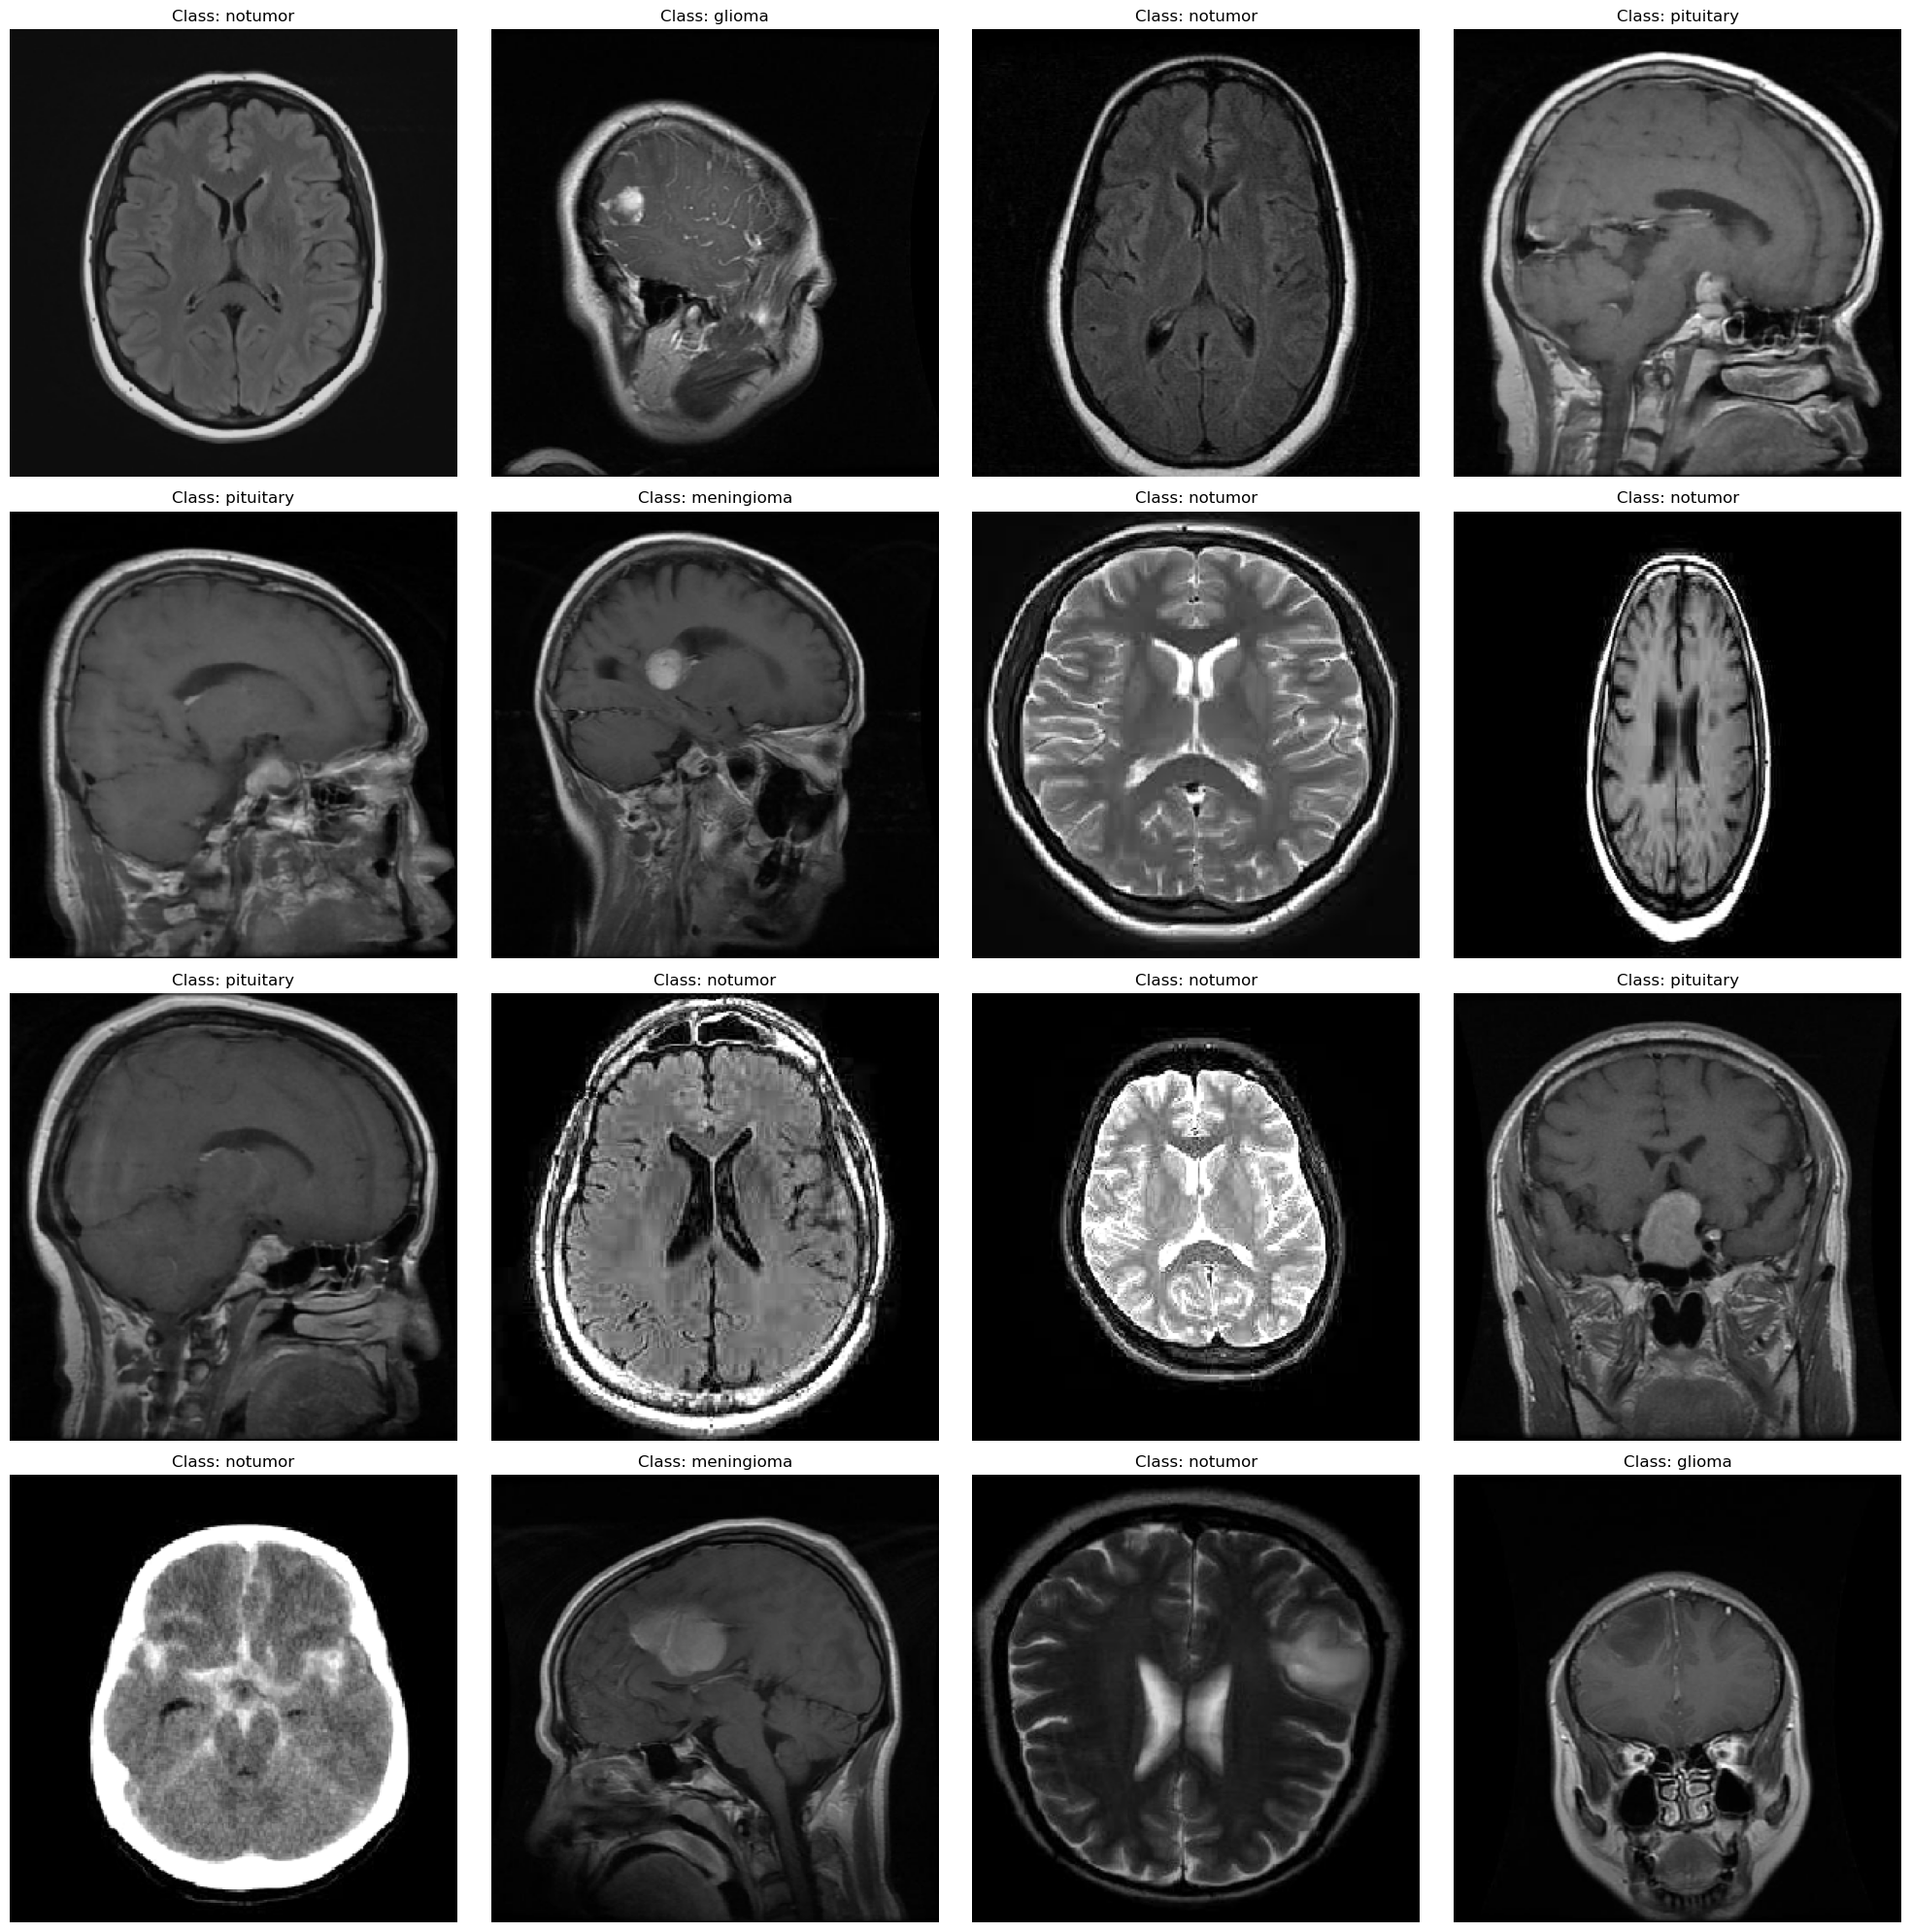

In [23]:
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    batch = next(tr_gen)
    image = batch[0][0]
    label = batch[1][0]
    plt.imshow(image)

    # Get the class index
    class_index = np.argmax(label)

    # Get the list of class names and class indices
    class_names = list(tr_gen.class_indices.keys())
    class_indices = list(tr_gen.class_indices.values())

    # Find the index of the class_index in the list of indeices
    index_position = class_indices.index(class_index)

    # Get the class name using the index position
    class_name = class_names[index_position]

    plt.title(f"Class: {class_name}" )
    plt.axis("off")
plt.tight_layout()
plt.show()
